In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm
import datetime

sns.set_style('dark')
pd.options.display.max_rows = None

In [2]:
transactions = pd.read_csv('../../../data/transactions_train_sample.csv',dtype={"article_id": "str"})
transactions = transactions[['customer_id','article_id']]

### Find Items Purchase Together

In [3]:
item_ids = transactions.article_id.unique()

In [6]:
users = transactions.loc[
            transactions.article_id == item_ids[0], 'customer_id'
        ].unique()

In [11]:
vc = transactions.loc[
        (transactions.customer_id.isin(users)) & (transactions.article_id != item_ids[0]),
        'article_id'
].value_counts()

In [20]:
pairs = {}
for i in tqdm(item_ids):
    users = transactions.loc[
                transactions.article_id == i, 'customer_id'
            ].unique()
    vc = transactions.loc[
        (transactions.customer_id.isin(users)) & (transactions.article_id != i),
        'article_id'
    ].value_counts()
    pairs[i] = list(vc.index[:6])

100%|██████████| 17033/17033 [01:33<00:00, 181.81it/s]


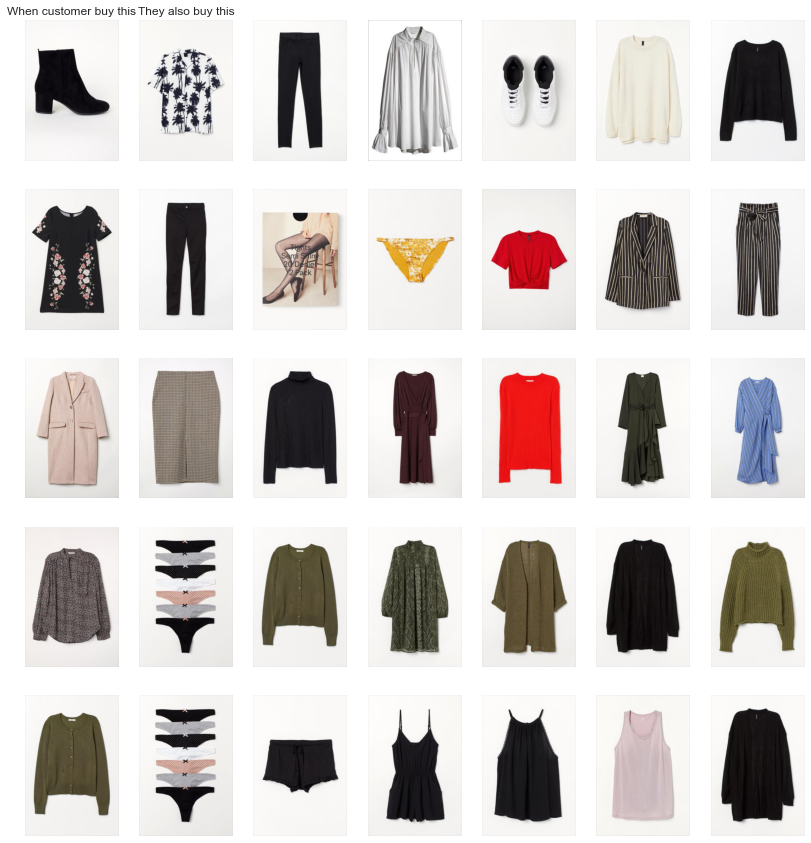

In [24]:
nr,nc = 5,7
fig,axes = plt.subplots(ncols=nc,nrows=nr,figsize=(nc*2,nr*3))

axes[0][0].set_title('When customer buy this')
axes[0][1].set_title('They also buy this')

for ax,(k,v) in zip(axes,pairs.items()):
    ax[0].imshow(
        plt.imread(f'../../../data/images/{k[:3]}/{k}.jpg'))
    ax[0].axis('off')

    for a,i in zip(ax[1:],v):
        a.imshow(
            plt.imread(f'../../../data/images/{i[:3]}/{i}.jpg'))
        a.axis('off')

### Save result

In [25]:
np.save('pairs.npy',pairs)